In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# List all files from the current folder with their directories
for dirname, _, filenames in os.walk(r'C:\Users\BRak\Desktop\Data Science\Kaggle - Titanic Competition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\BRak\Desktop\Data Science\Kaggle - Titanic Competition\gender_submission.csv
C:\Users\BRak\Desktop\Data Science\Kaggle - Titanic Competition\Kaggle - Titanic ML Competition.ipynb
C:\Users\BRak\Desktop\Data Science\Kaggle - Titanic Competition\submission.csv
C:\Users\BRak\Desktop\Data Science\Kaggle - Titanic Competition\test.csv
C:\Users\BRak\Desktop\Data Science\Kaggle - Titanic Competition\train.csv
C:\Users\BRak\Desktop\Data Science\Kaggle - Titanic Competition\.ipynb_checkpoints\Kaggle - Titanic ML Competition-checkpoint.ipynb


In [3]:
# Read train data
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get number of rows and columns
df_train.shape

(891, 12)

In [5]:
# Inspect data type of each feature
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
df_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
df_train["Cabin"] = df_train["Cabin"].fillna(0)
df_train.head()
df_train["Cabin"] = df_train["Cabin"].apply(lambda x:1 if (x != 0) else 0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [11]:
df_train['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [12]:
cabin_df = df_train.groupby('Cabin')['Survived'].value_counts(normalize=True).unstack()
cabin_df

Survived,0,1
Cabin,,
0,0.700146,0.299854
1,0.333333,0.666667


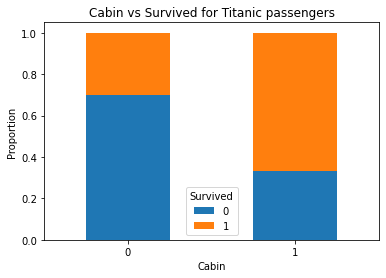

In [13]:
fig, ax = plt.subplots()

cabin_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Cabin')
ax.set_xticklabels(cabin_df.index.tolist(),rotation=0)
ax.set_ylabel('Proportion')
ax.set_title('Cabin vs Survived for Titanic passengers')

plt.show()

In [14]:
df_train.value_counts(subset=['Pclass', 'Survived'])

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

Text(0.5, 1.0, 'Age vs Fare')

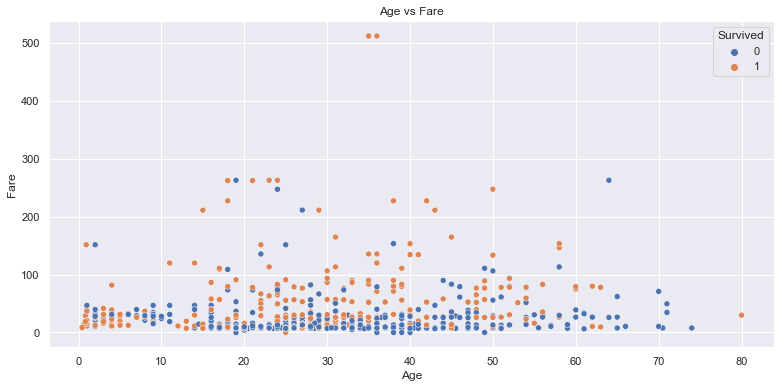

In [15]:
sns.set(rc={'figure.figsize':(13,6)})
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)
plt.title('Age vs Fare')

Text(0.5, 1.0, 'Age vs Survived')

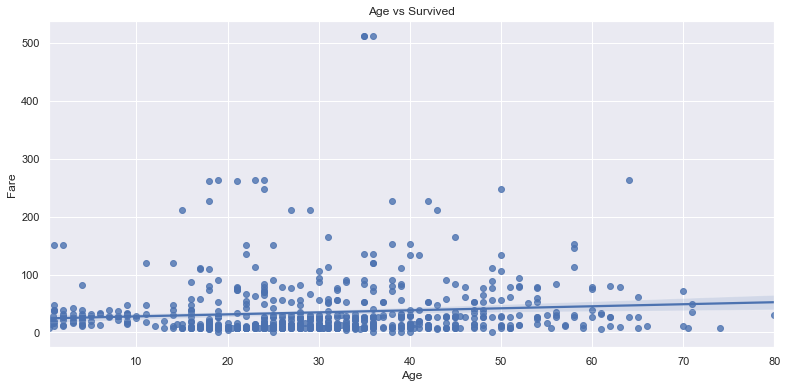

In [16]:
sns.regplot(x='Age', y='Fare', data=df_train)
plt.title('Age vs Survived')

In [17]:
# Let's drop PassengerId since it is useless
df_train.drop('PassengerId', axis=1, inplace=True)

In [18]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [19]:
df_train.dropna(subset=['Age'], inplace=True)

Text(0.5, 1.0, 'Age vs Survival for Titanic Passengers')

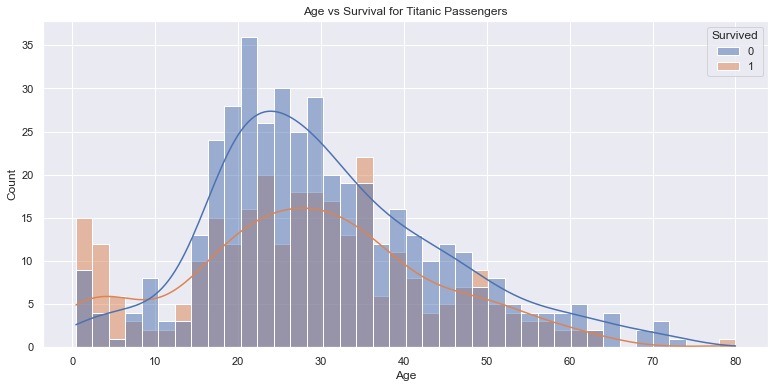

In [20]:
sns.histplot(data=df_train, x='Age', bins=40, kde=True, hue='Survived', multiple='layer')
plt.title("Age vs Survival for Titanic Passengers")

Text(0.5, 1.0, 'Fare vs Survival for Titanic Passengers')

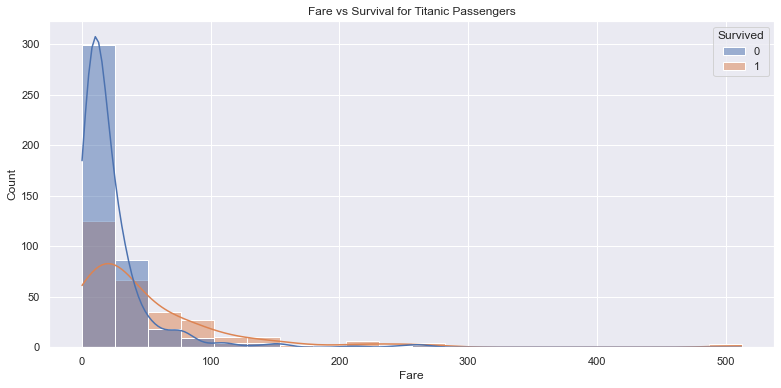

In [21]:
sns.histplot(data=df_train, x='Fare', bins=20, kde=True, hue='Survived', multiple='layer')
plt.title('Fare vs Survival for Titanic Passengers')

Text(0.5, 1.0, 'Age vs Survival for Titanic Passengers')

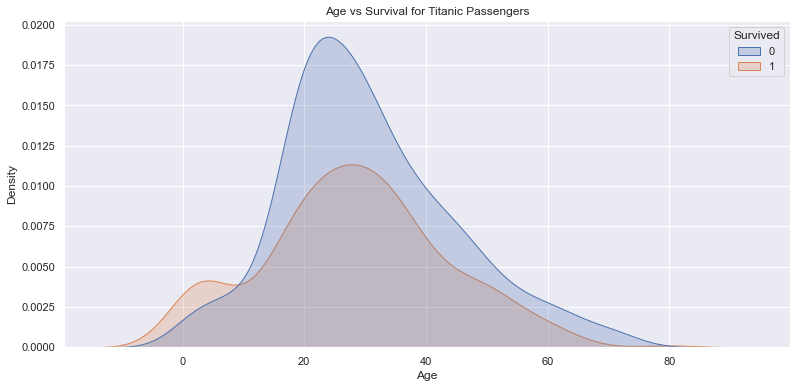

In [22]:
sns.kdeplot(data=df_train, x='Age', hue='Survived', shade=True)
plt.title("Age vs Survival for Titanic Passengers")

Text(0.5, 1.0, 'Age vs Survival for Titanic Passengers')

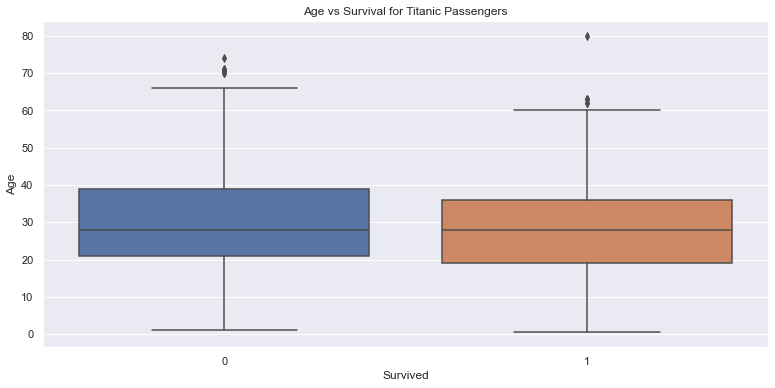

In [23]:
sns.boxplot(data=df_train, x='Survived', y='Age')
plt.title("Age vs Survival for Titanic Passengers")

Text(0.5, 1.0, 'Pclass vs Survival for Titanic Passengers')

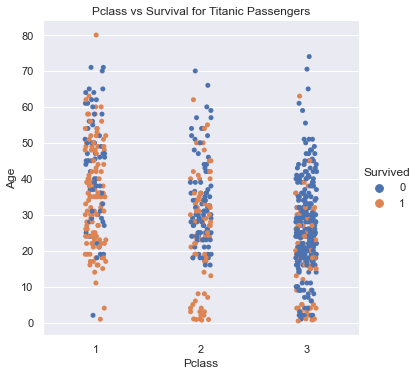

In [24]:
sns.catplot(data=df_train, x='Pclass', y='Age', hue='Survived', kind='strip')
plt.title("Pclass vs Survival for Titanic Passengers")

Text(0.5, 1.0, 'Pclass vs Survival for Titanic Passengers')

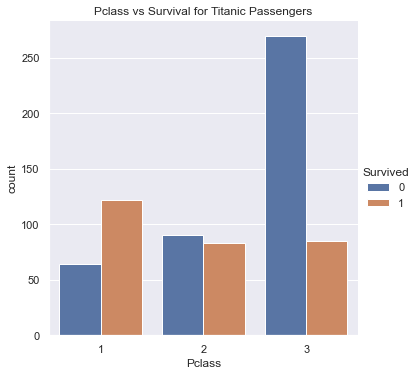

In [25]:
sns.catplot(data=df_train, x='Pclass', hue='Survived', kind='count')
plt.title("Pclass vs Survival for Titanic Passengers")

Text(0.5, 1.0, 'Pclass vs Survival for Titanic Passengers')

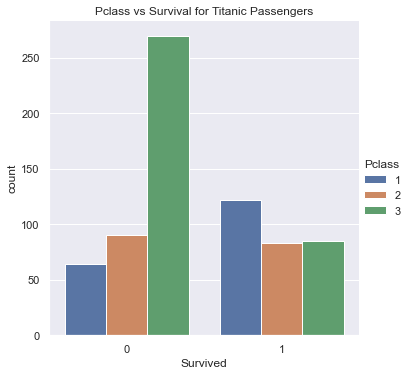

In [26]:
sns.catplot(data=df_train, x='Survived', hue='Pclass', kind='count')
plt.title("Pclass vs Survival for Titanic Passengers")

In [27]:
counts_df = df_train.groupby(['Pclass', 'Survived'])['Age'].count().unstack()
counts_df

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


In [28]:
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T
survived_percents_df

Survived,0,1
Pclass,,
1,0.344086,0.655914
2,0.520231,0.479769
3,0.760563,0.239437


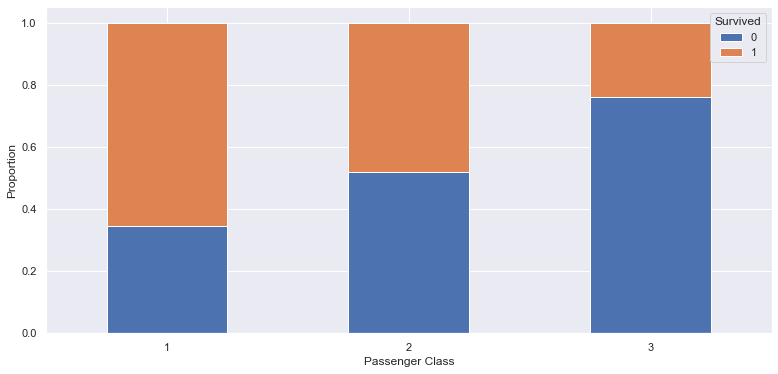

In [29]:
fig, ax = plt.subplots()

survived_percents_df.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")

plt.show()

In [30]:
surv_percents_df = df_train.groupby(['Survived'])['Pclass'].value_counts(normalize=True).unstack()
surv_percents_df

Pclass,1,2,3
Survived,,,
0,0.150943,0.212264,0.636792
1,0.420690,0.286207,0.293103


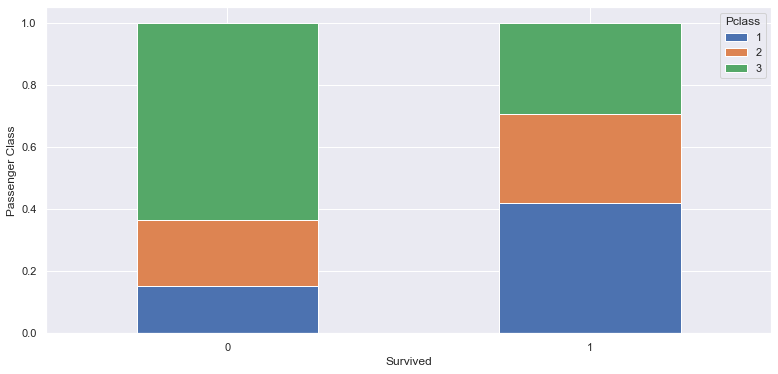

In [31]:
fig, ax = plt.subplots()

surv_percents_df.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Survived')
ax.set_xticklabels([0,1], rotation=0)
ax.set_ylabel('Passenger Class')

plt.show()

In [32]:
df_train.drop('Name', axis=1, inplace=True)
df_train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,female,35.0,1,0,113803,53.1000,1,S
4,0,3,male,35.0,0,0,373450,8.0500,0,S
6,0,1,male,54.0,0,0,17463,51.8625,1,S
7,0,3,male,2.0,3,1,349909,21.0750,0,S
8,1,3,female,27.0,0,2,347742,11.1333,0,S
9,1,2,female,14.0,1,0,237736,30.0708,0,C
10,1,3,female,4.0,1,1,PP 9549,16.7000,1,S


In [33]:
df_train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,female,35.0,1,0,113803,53.1000,1,S
4,0,3,male,35.0,0,0,373450,8.0500,0,S
6,0,1,male,54.0,0,0,17463,51.8625,1,S
7,0,3,male,2.0,3,1,349909,21.0750,0,S
8,1,3,female,27.0,0,2,347742,11.1333,0,S
9,1,2,female,14.0,1,0,237736,30.0708,0,C
10,1,3,female,4.0,1,1,PP 9549,16.7000,1,S


In [34]:
df_train['Cabin'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: Cabin, Length: 714, dtype: bool

In [35]:
df_train.drop('Ticket', axis=1, inplace=True)

In [36]:
features_to_plot = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [37]:
df_train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()

Survived,0,1
Pclass,,
1,0.344086,0.655914
2,0.520231,0.479769
3,0.760563,0.239437


In [38]:
def plot_cat_features(data_frame, list_of_features):
    #fig, ax = plt.subplots(len(list_of_features))
    
    for index, feature in enumerate(list_of_features):
        feature_df = data_frame.groupby(feature)['Survived'].value_counts(normalize=True).unstack()
        ax = feature_df.plot(kind='bar', stacked=True)
        ax.set_xlabel(feature)
        ax.set_xticklabels(feature_df.index.tolist(),rotation=0)
        ax.set_ylabel('Proportion')
        ax.set_title(feature + ' vs Survived for Titanic passengers')
        
    return

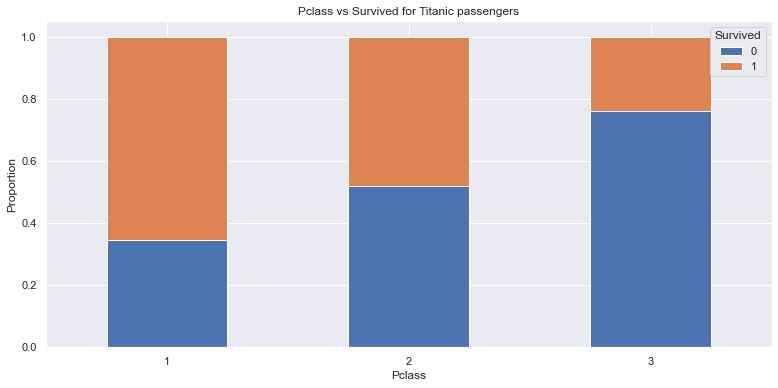

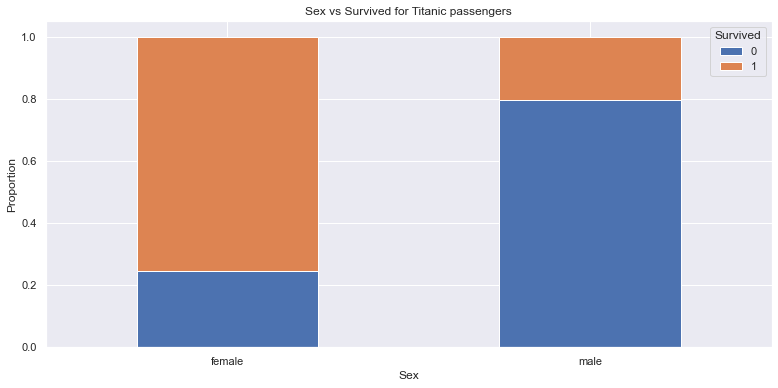

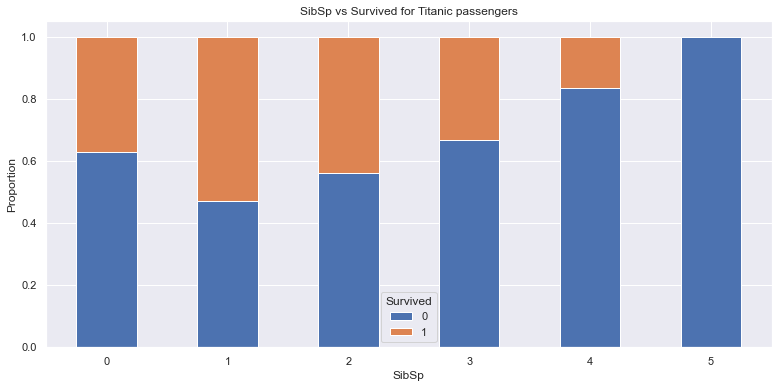

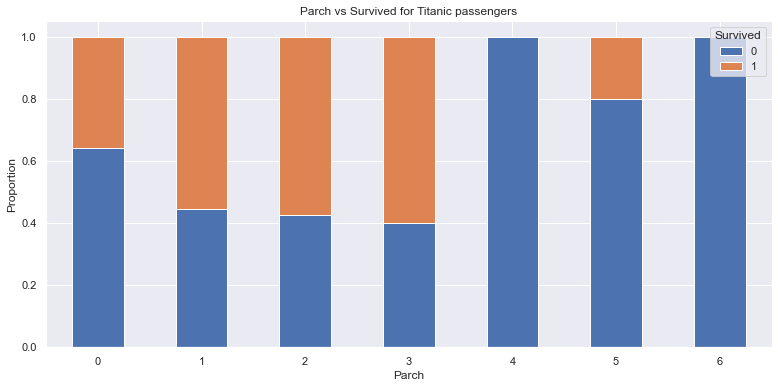

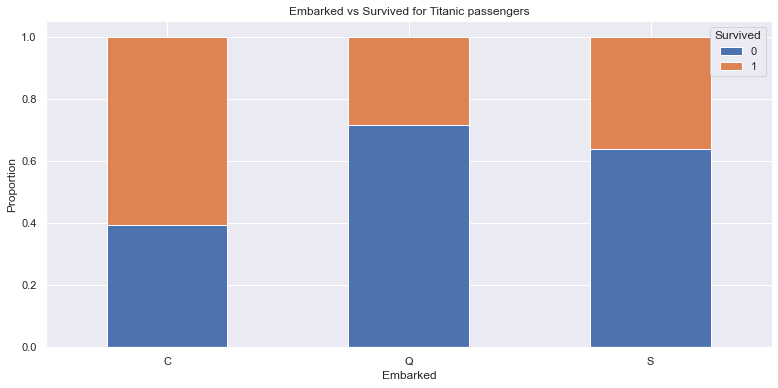

In [39]:
figure = plot_cat_features(df_train, features_to_plot)

In [40]:
df_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S
6,0,1,male,54.0,0,0,51.8625,1,S
7,0,3,male,2.0,3,1,21.0750,0,S
8,1,3,female,27.0,0,2,11.1333,0,S
9,1,2,female,14.0,1,0,30.0708,0,C
10,1,3,female,4.0,1,1,16.7000,1,S


# Data Normalization and pre-processing, Feature engineering

1. Let's check two options - what happens if I do feature engineering on Parch and SibSp Sex and Pclass (use labmba functions)
2. Do one-hot encoding
3. Do the data normalization after train test split


In [41]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [42]:
df_train['Pclass'] = df_train['Pclass'].replace({1:'1st_Class', 2:'2nd_Class', 3:'3rd_Class'}, value=None)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3rd_Class,male,22.0,1,0,7.2500,0,S
1,1,1st_Class,female,38.0,1,0,71.2833,1,C
2,1,3rd_Class,female,26.0,0,0,7.9250,0,S
3,1,1st_Class,female,35.0,1,0,53.1000,1,S
4,0,3rd_Class,male,35.0,0,0,8.0500,0,S


In [43]:
# Change male = 0 and female = 1
df_train['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3rd_Class,0,22.0,1,0,7.2500,0,S
1,1,1st_Class,1,38.0,1,0,71.2833,1,C
2,1,3rd_Class,1,26.0,0,0,7.9250,0,S
3,1,1st_Class,1,35.0,1,0,53.1000,1,S
4,0,3rd_Class,0,35.0,0,0,8.0500,0,S


# Let's try without engineering SibSP and Parch
### 1. Do one hot encoding
### 2. Train test split
### 3. Normalize the data

In [44]:
data = pd.concat([df_train[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']],pd.get_dummies(df_train[['Pclass', 'Embarked']])], axis = 1)
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1st_Class,Pclass_2nd_Class,Pclass_3rd_Class,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0,0,0,1,0,0,1


In [58]:
X = data.drop('Survived', axis=1)
X.describe()

,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1st_Class,Pclass_2nd_Class,Pclass_3rd_Class,Embarked_C,Embarked_Q,Embarked_S
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.365546,29.699118,0.512605,0.431373,34.694514,0.259104,0.260504,0.242297,0.497199,0.182073,0.039216,0.775910
std,0.481921,14.526497,0.929783,0.853289,52.918930,0.438450,0.439217,0.428773,0.500343,0.386175,0.194244,0.417274
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
X = X.values
Y = data['Survived'].values

In [47]:
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [54]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [49]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived']); ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])

In [50]:
# X_train before normalization
X_train[0:5]

array([[ 0.    , 25.    ,  0.    ,  0.    , 13.    ,  0.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 0.    , 20.5   ,  0.    ,  0.    ,  7.25  ,  0.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
       [ 0.    , 54.    ,  0.    ,  0.    , 14.    ,  0.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 1.    , 27.    ,  0.    ,  0.    , 10.5   ,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 0.    , 40.    ,  0.    ,  0.    , 27.7208,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ,  0.    ,  0.    ]])

In [59]:
# lets test the normalization
mean = X_train.mean(axis=0)
X_train = X_train - mean
X_train[0:5]

array([[ -0.36252189,  -4.95856392,  -0.50087566,  -0.42206655,
        -22.11235359,  -0.27145359,  -0.27145359,   0.75831874,
         -0.48686515,  -0.18739054,  -0.04028021,   0.23117338],
       [ -0.36252189,  -9.45856392,  -0.50087566,  -0.42206655,
        -27.86235359,  -0.27145359,  -0.27145359,  -0.24168126,
          0.51313485,  -0.18739054,  -0.04028021,   0.23117338],
       [ -0.36252189,  24.04143608,  -0.50087566,  -0.42206655,
        -21.11235359,  -0.27145359,  -0.27145359,   0.75831874,
         -0.48686515,  -0.18739054,  -0.04028021,   0.23117338],
       [  0.63747811,  -2.95856392,  -0.50087566,  -0.42206655,
        -24.61235359,   0.72854641,  -0.27145359,   0.75831874,
         -0.48686515,  -0.18739054,  -0.04028021,   0.23117338],
       [ -0.36252189,  10.04143608,  -0.50087566,  -0.42206655,
         -7.39155359,  -0.27145359,   0.72854641,  -0.24168126,
         -0.48686515,   0.81260946,  -0.04028021,  -0.76882662]])

In [51]:
# X_train after normalization
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[-0.75410962, -0.34136671, -0.5481543 , -0.50727737, -0.42748946,
        -0.61040655, -0.61040655,  1.7713501 , -0.97406646, -0.48021188,
        -0.20486777,  0.54834603],
       [-0.75410962, -0.65116411, -0.5481543 , -0.50727737, -0.53865195,
        -0.61040655, -0.61040655, -0.56454114,  1.026624  , -0.48021188,
        -0.20486777,  0.54834603],
       [-0.75410962,  1.65510541, -0.5481543 , -0.50727737, -0.40815685,
        -0.61040655, -0.61040655,  1.7713501 , -0.97406646, -0.48021188,
        -0.20486777,  0.54834603],
       [ 1.32606716, -0.20367898, -0.5481543 , -0.50727737, -0.47582098,
         1.63825241, -0.61040655,  1.7713501 , -0.97406646, -0.48021188,
        -0.20486777,  0.54834603],
       [-0.75410962,  0.69129128, -0.5481543 , -0.50727737, -0.14289801,
        -0.61040655,  1.63825241, -0.56454114, -0.97406646,  2.08241413,
        -0.20486777, -1.82366597]])

In [52]:
"""
To do:
do normalization for x-test,y-train, y-test
check how a model would perform without normalization too !
check manually if normalization is what I read

https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

"""

'\nTo do:\ndo normalization for x-test,y-train, y-test\ncheck how a model would perform without normalization too !\ncheck manually if normalization is what I read\n'

In [53]:
#KNN model
# parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'p': [1,2]}

# KNN = KNeighborsClassifier()